In [1]:
## Enable matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt

## Imports
import pandas as pd
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

import numpy as np
from sklearn import ensemble

import mytools

In [4]:
## Read in training data
train = pd.read_csv('train.csv')

In [5]:
train = mytools.collapse_time_series(train, clean_neg=True)
train = mytools.clean_stuck_gauges(train, threshold=20)
train = train[train['Expected'] < 50.0]

In [6]:
splitter = mytools.Splitter(train)

## Perfect Data

In [7]:
perfect = splitter.perfect()

In [23]:
sm_perfect = mytools.ScatterMatrix(perfect)
sm_perfect.add('radardist_km', 0, 20)
sm_perfect.add('Ref', 0, 50)
sm_perfect.add('RefComposite', 0, 50)
sm_perfect.add('RhoHV', 0.8, 1.05)
sm_perfect.add('Zdr', -2,3)
sm_perfect.add('Kdp', -10, 10)
sm_perfect.add('Expected', 0, 10)

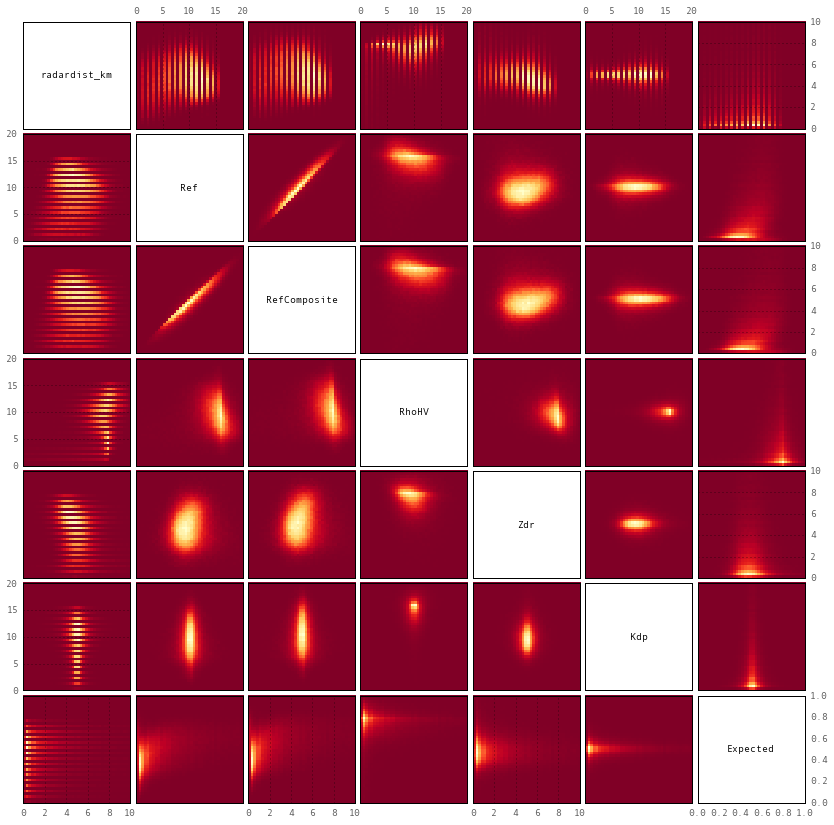

In [24]:
sm_perfect.plot()

In [33]:
print np.nanmean(perfect['Ref'].values)
print np.nanmean(perfect['Ref_5x5_10th'].values)
print np.nanmean(perfect['Ref_5x5_50th'].values)
print np.nanmean(perfect['Ref_5x5_90th'].values)
print
print np.nanmean(perfect['RefComposite'].values)
print np.nanmean(perfect['RefComposite_5x5_10th'].values)
print np.nanmean(perfect['RefComposite_5x5_50th'].values)
print np.nanmean(perfect['RefComposite_5x5_90th'].values)
print
print np.nanmean(perfect['RhoHV'].values)
print np.nanmean(perfect['RhoHV_5x5_10th'].values)
print np.nanmean(perfect['RhoHV_5x5_50th'].values)
print np.nanmean(perfect['RhoHV_5x5_90th'].values)
print
print np.nanmedian(perfect['Zdr'].values)
print np.nanmedian(perfect['Zdr_5x5_10th'].values)
print np.nanmedian(perfect['Zdr_5x5_50th'].values)
print np.nanmedian(perfect['Zdr_5x5_90th'].values)
print
print np.nanmedian(perfect['Kdp'].values)
print np.nanmedian(perfect['Kdp_5x5_10th'].values)
print np.nanmedian(perfect['Kdp_5x5_50th'].values)
print np.nanmedian(perfect['Kdp_5x5_90th'].values)

23.6332279789
19.8866237824
23.3781565127
27.5914482724

25.6882672577
22.3515056183
25.4277987182
29.3932289153

0.980553159498
0.934358771461
0.983294273888
1.01559613475

0.40625
-0.692307692308
0.272727272727
1.75625

0.0308278416667
-3.1699982
-0.173574175
3.74721865556


In [31]:
## Derive correction factors
Ref   = np.nanmean(perfect['Ref'].values)
Ref10 = np.nanmean(perfect['Ref_5x5_10th'].values)
Ref50 = np.nanmean(perfect['Ref_5x5_50th'].values)
Ref90 = np.nanmean(perfect['Ref_5x5_90th'].values)

print Ref/Ref10
print Ref/Ref50
print Ref/Ref90
print

RefComposite   = np.nanmean(perfect['RefComposite'].values)
RefComposite10 = np.nanmean(perfect['RefComposite_5x5_10th'].values)
RefComposite50 = np.nanmean(perfect['RefComposite_5x5_50th'].values)
RefComposite90 = np.nanmean(perfect['RefComposite_5x5_90th'].values)

print RefComposite/RefComposite10
print RefComposite/RefComposite50
print RefComposite/RefComposite90
print

RhoHV   = np.nanmean(perfect['RhoHV'].values)
RhoHV10 = np.nanmean(perfect['RhoHV_5x5_10th'].values)
RhoHV50 = np.nanmean(perfect['RhoHV_5x5_50th'].values)
RhoHV90 = np.nanmean(perfect['RhoHV_5x5_90th'].values)

print RhoHV/RhoHV10
print RhoHV/RhoHV50
print RhoHV/RhoHV90
print

1.18839820361
1.01091067493
0.856541771404

1.14928576609
1.01024345609
0.873951865981

1.04943966862
0.997212315313
0.965495166772



## Basic Perfect Data

In [10]:
basic = splitter.basic_perfect()

In [11]:
sm_basic = mytools.ScatterMatrix(basic)
sm_basic.add('radardist_km', 0, 20)
sm_basic.add('Ref', 0, 50)
sm_basic.add('RefComposite', 0, 50)
sm_basic.add('Expected', 0, 50)

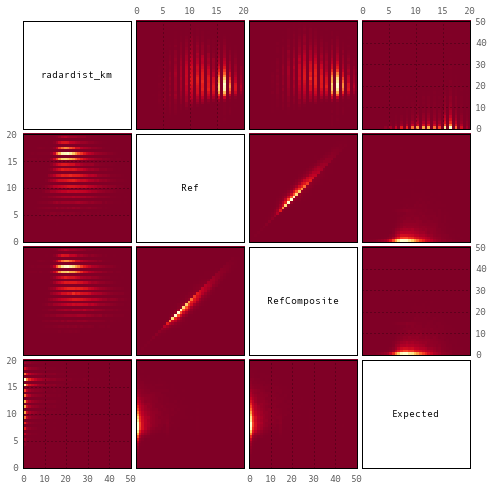

In [12]:
sm_basic.plot()

## Missing Data

In [13]:
missing = splitter.all_missing()

In [14]:
print 'Perfect :', perfect['Expected'].values.mean()
print 'Basic   :', basic['Expected'].values.mean()
print 'Missing :', missing['Expected'].values.mean()

Perfect : 3.21007670755
Basic   : 3.81745095266
Missing : 1.98761569937


In [15]:
print 'Perfect :', np.median(perfect['Expected'].values)
print 'Basic   :', np.median(basic['Expected'].values)
print 'Missing :', np.median(missing['Expected'].values)

Perfect : 1.2700007
Basic   : 1.5240008
Missing : 0.50800025


In [16]:
def mode(array, nbins=100):
    h, b = np.histogram(array, nbins, (0,50))
    return b[np.argmax(h)]

In [17]:
nbins = 1000
print 'Perfect :', mode(perfect['Expected'].values, nbins=nbins)
print 'Basic   :', mode(basic['Expected'].values, nbins=nbins)
print 'Missing :', mode(missing['Expected'].values, nbins=nbins)

Perfect : 0.25
Basic   : 0.25
Missing : 0.25


## Partial Data

In [18]:
partial = splitter.partial()

In [19]:
partial

,Id,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,radardist_km,Expected,count,large_count
2,3,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,0.801667,NaN,NaN,NaN,2.062500,NaN,NaN,NaN,NaN,10,26.162014,1,True
3,4,26.600000,20.071429,25.800000,30.269231,26.666667,21.090909,25.115385,32.230769,0.988333,NaN,0.988333,1.015833,-1.125000,NaN,0.500000,1.515625,7.029999,NaN,0.000000,6.329994,9,4.064002,1,True
34,35,19.200000,13.250000,15.083333,23.111111,19.200000,13.250000,15.083333,23.111111,1.008333,NaN,0.994167,1.049583,0.166667,NaN,-0.218750,1.515625,1.122494,NaN,-0.350006,2.123329,8,1.524001,1,True
35,36,12.750000,NaN,NaN,13.166667,12.750000,NaN,NaN,13.166667,1.051667,NaN,NaN,1.032778,-1.937500,NaN,NaN,1.270833,NaN,NaN,NaN,NaN,12,0.254000,1,True
36,37,1.785714,NaN,2.142857,8.857143,5.142857,0.285714,4.000000,9.928571,0.893571,0.729286,0.970238,1.031667,0.375000,-1.821429,-0.196429,1.196429,NaN,NaN,NaN,-1.173340,2,0.254000,1,True
38,39,4.333333,0.000000,3.500000,7.500000,4.666667,2.750000,5.000000,8.333333,1.020556,0.977000,1.010000,1.036111,0.302083,-0.537500,0.281250,1.541667,-1.410004,NaN,-1.410004,1.499996,5,0.254000,1,True
41,42,28.055556,21.200000,26.350000,27.833333,28.214286,25.000000,28.321429,32.392857,NaN,NaN,NaN,0.981667,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,7,1.016000,1,True
56,57,28.333333,23.791667,27.958333,31.461538,28.730769,25.846154,29.000000,33.423077,1.001667,NaN,0.985000,1.043889,0.875000,NaN,-0.041667,2.333333,6.954994,NaN,-6.330002,4.557491,8,1.270001,1,True
66,67,19.500000,14.250000,18.500000,18.600000,22.100000,17.100000,20.900000,21.666667,1.031667,0.975000,0.936111,1.024444,2.125000,-2.187500,-0.187500,2.395833,NaN,NaN,NaN,2.464996,5,0.762000,1,True
69,70,5.000000,4.200000,6.500000,8.083333,6.900000,5.200000,7.300000,9.833333,0.996667,0.950333,0.998889,1.038333,0.916667,-0.075000,0.489583,2.708333,0.000000,NaN,NaN,0.000000,12,0.254000,1,True


## Basic Partial

In [20]:
basic_partial = splitter.basic_partial()

In [21]:
basic_partial

,Id,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,radardist_km,Expected,count,large_count
18,19,19.700000,NaN,17.625000,20.681818,18.333333,15.750000,17.312500,20.653846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,3.810002,1,True
24,25,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,1.016000,1,True
39,40,17.333333,NaN,23.000000,25.437500,16.000000,NaN,17.000000,26.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,4.318002,1,True
82,83,NaN,NaN,NaN,20.500000,NaN,NaN,NaN,20.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,0.254000,1,True
90,91,NaN,NaN,NaN,23.916667,NaN,NaN,16.000000,24.357143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,0.254000,1,True
92,93,22.750000,NaN,19.750000,28.000000,22.750000,NaN,19.750000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,8.636004,1,True
98,99,14.000000,NaN,8.000000,13.750000,14.500000,NaN,10.500000,13.875000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,0.254000,1,True
119,120,22.500000,NaN,17.000000,21.500000,22.500000,NaN,18.500000,21.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,0.508000,1,True
123,124,NaN,NaN,NaN,14.750000,NaN,NaN,NaN,16.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,1.524001,1,True
131,132,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2.032001,1,True


In [22]:
print len(train)
print len(perfect) + len(missing) + len(basic) + len(partial) + len(basic_partial)

1064502
1064502
